In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('pizza_v2.csv')

In [3]:
data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


# data preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [5]:
data.isnull().sum(axis=0)

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [6]:
data.duplicated().any()

True

In [7]:
data.shape

(129, 9)

In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(127, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          127 non-null    object
 1   price_rupiah     127 non-null    object
 2   diameter         127 non-null    object
 3   topping          127 non-null    object
 4   variant          127 non-null    object
 5   size             127 non-null    object
 6   extra_sauce      127 non-null    object
 7   extra_cheese     127 non-null    object
 8   extra_mushrooms  127 non-null    object
dtypes: object(9)
memory usage: 9.9+ KB


In [11]:
data.describe(include='all')

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,127,127,127,127,127,127,127,127,127
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,28,30,41,76,84,71


In [12]:
data.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [13]:
data['company'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [14]:
data['company'].value_counts()

C    30
E    28
A    25
B    24
D    20
Name: company, dtype: int64

In [15]:
print('there are 5 category on company like A, B, C,D, E')

there are 5 category on company like A, B, C,D, E


In [16]:
data['price_rupiah'].unique()

array(['Rp235,000', 'Rp198,000', 'Rp120,000', 'Rp155,000', 'Rp248,000',
       'Rp140,000', 'Rp110,000', 'Rp70,000', 'Rp90,000', 'Rp230,000',
       'Rp188,000', 'Rp114,000', 'Rp149,000', 'Rp23,500', 'Rp46,000',
       'Rp72,000', 'Rp49,000', 'Rp83,000', 'Rp96,000', 'Rp31,000',
       'Rp69,000', 'Rp93,000', 'Rp75,000', 'Rp115,000', 'Rp123,000',
       'Rp33,000', 'Rp76,000', 'Rp119,000', 'Rp126,500', 'Rp39,000',
       'Rp99,000', 'Rp44,000', 'Rp78,000', 'Rp105,000', 'Rp35,000',
       'Rp60,000', 'Rp98,000', 'Rp28,000', 'Rp51,000', 'Rp84,000',
       'Rp32,000', 'Rp54,000', 'Rp92,000'], dtype=object)

In [17]:
data['topping'].value_counts()

chicken         28
mushrooms       22
mozzarella      20
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

In [18]:
data=data.rename({
    'price_rupiah':'price'
}, axis=1)

data

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [19]:
data['price']=data['price'].str.replace('Rp','')
data['price']=data['price'].str.replace(',','')
data['price']=data['price'].astype('int32')

In [20]:
data['diameter']=data['diameter'].str.replace(' inch','').astype('float32')

In [21]:
data['price']

0      235000
1      198000
2      120000
3      155000
4      248000
        ...  
124     39000
125     72000
126     99000
127     44000
128     78000
Name: price, Length: 127, dtype: int32

In [22]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [23]:
data['diameter'].unique()

array([22. , 20. , 16. , 14. , 18. , 18.5,  8. , 12. , 16.5,  8.5, 17. ],
      dtype=float32)

In [24]:
data['diameter'].value_counts()

12.0    49
14.0    24
8.5     22
17.0     8
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

In [25]:
data

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,39000,8.5,tuna,spicy tuna,small,yes,yes,yes
125,E,72000,12.0,tuna,spicy tuna,medium,yes,yes,yes
126,E,99000,14.0,tuna,spicy tuna,large,yes,yes,yes
127,E,44000,8.5,meat,BBQ_meat_fiesta,small,yes,no,yes


In [26]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [27]:
data['diameter'].unique()

array([22. , 20. , 16. , 14. , 18. , 18.5,  8. , 12. , 16.5,  8.5, 17. ],
      dtype=float32)

In [28]:
# univarient and bi varient analysis
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [29]:
data

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,39000,8.5,tuna,spicy tuna,small,yes,yes,yes
125,E,72000,12.0,tuna,spicy tuna,medium,yes,yes,yes
126,E,99000,14.0,tuna,spicy tuna,large,yes,yes,yes
127,E,44000,8.5,meat,BBQ_meat_fiesta,small,yes,no,yes


In [30]:
data['topping'].unique()

array(['chicken', 'papperoni', 'mushrooms', 'smoked_beef', 'mozzarella',
       'black_papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables',
       'beef'], dtype=object)

In [31]:
data['variant'].unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

In [32]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [33]:
data['company'].value_counts()

C    30
E    28
A    25
B    24
D    20
Name: company, dtype: int64

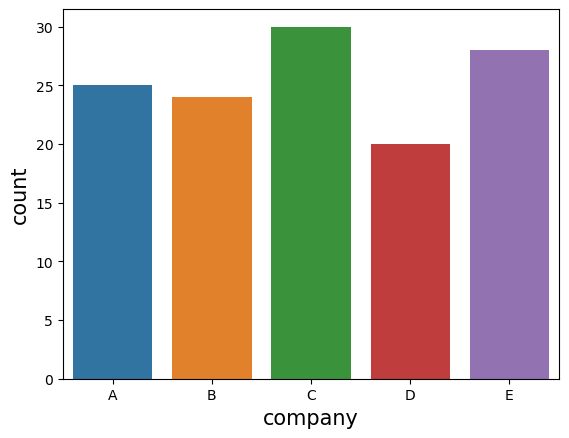

In [34]:
sns.countplot(x='company', data=data)
plt.xlabel('company', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

In [35]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [36]:
data['price']


0      235000
1      198000
2      120000
3      155000
4      248000
        ...  
124     39000
125     72000
126     99000
127     44000
128     78000
Name: price, Length: 127, dtype: int32

In [37]:
data['price'].value_counts()

72000     11
90000      8
46000      7
96000      5
75000      5
49000      5
83000      4
140000     4
110000     4
70000      4
99000      4
39000      4
149000     4
44000      3
31000      3
78000      3
35000      3
60000      3
69000      3
93000      3
98000      3
23500      3
119000     2
105000     2
230000     2
188000     2
114000     2
126500     2
76000      2
33000      2
123000     2
115000     2
51000      1
84000      1
32000      1
54000      1
28000      1
235000     1
198000     1
248000     1
155000     1
120000     1
92000      1
Name: price, dtype: int64

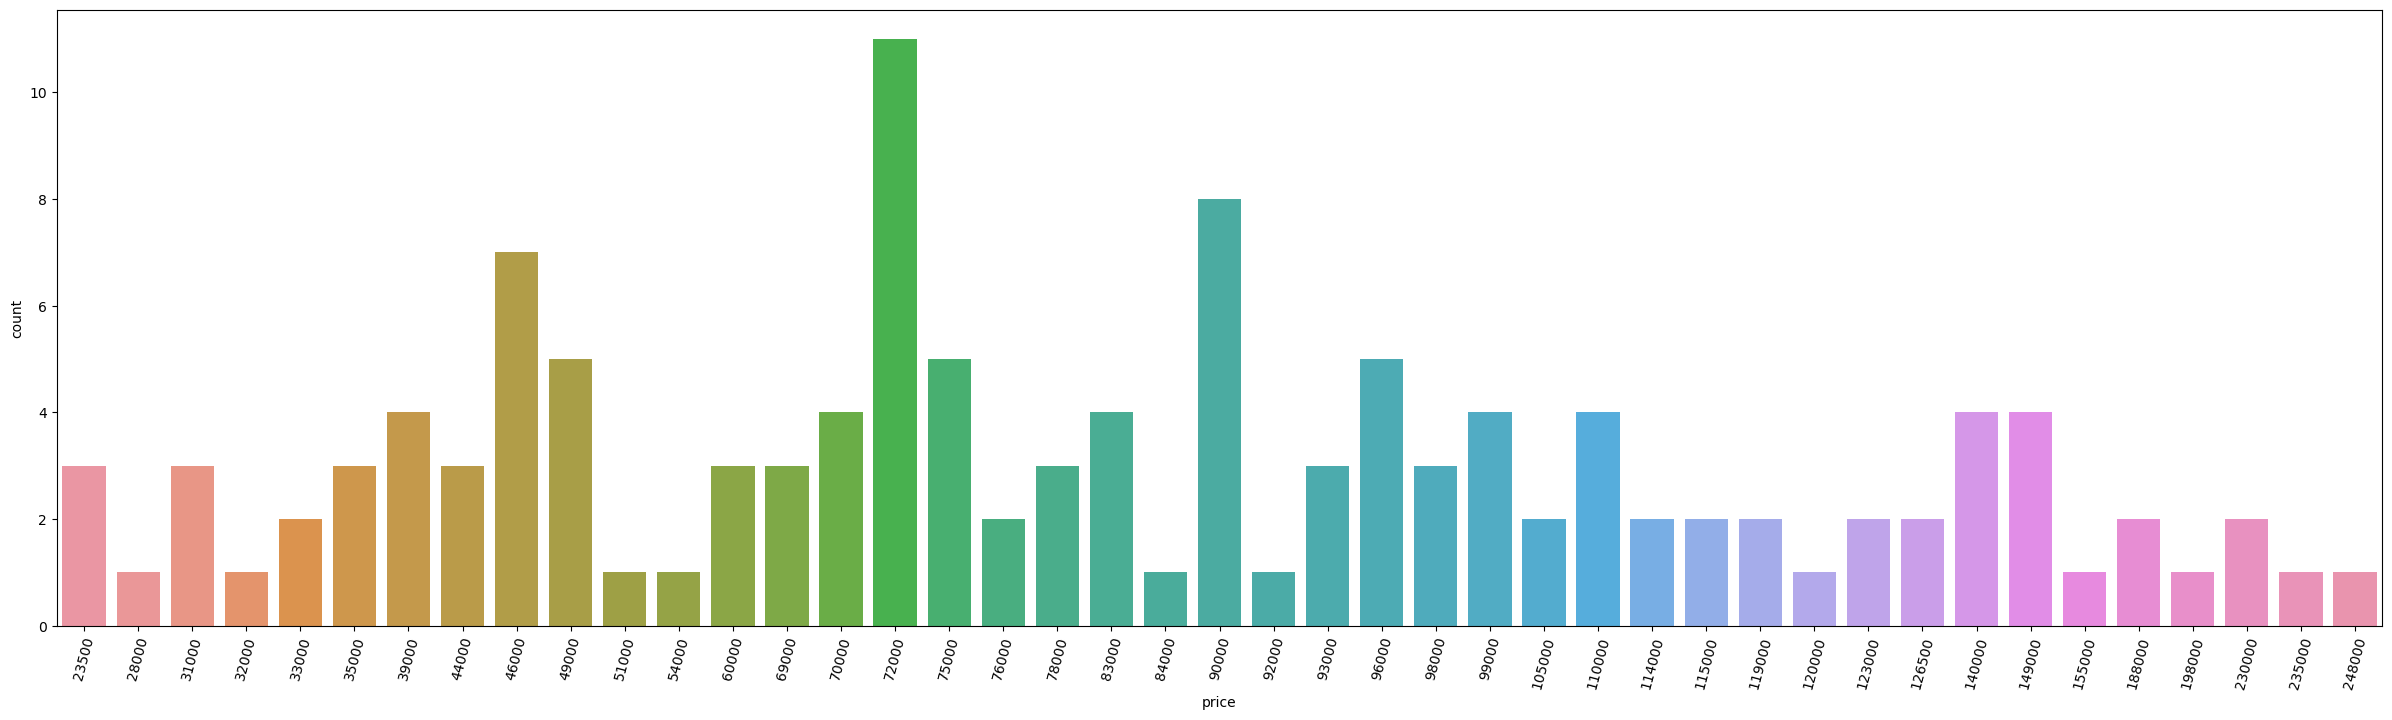

In [38]:
plt.figure(figsize=(30, 8))
sns.countplot(x='price', data=data)
plt.xticks(rotation=75)
plt.show()



In [39]:
data['diameter'].value_counts()

12.0    49
14.0    24
8.5     22
17.0     8
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

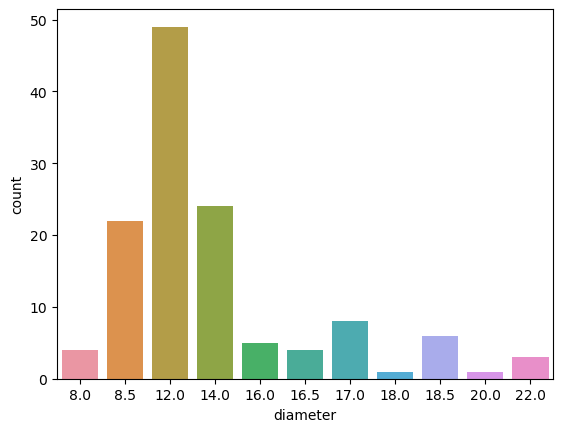

In [40]:
sns.countplot(x='diameter', data=data)
plt.show()

In [41]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [42]:
data['topping'].value_counts()

chicken         28
mushrooms       22
mozzarella      20
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

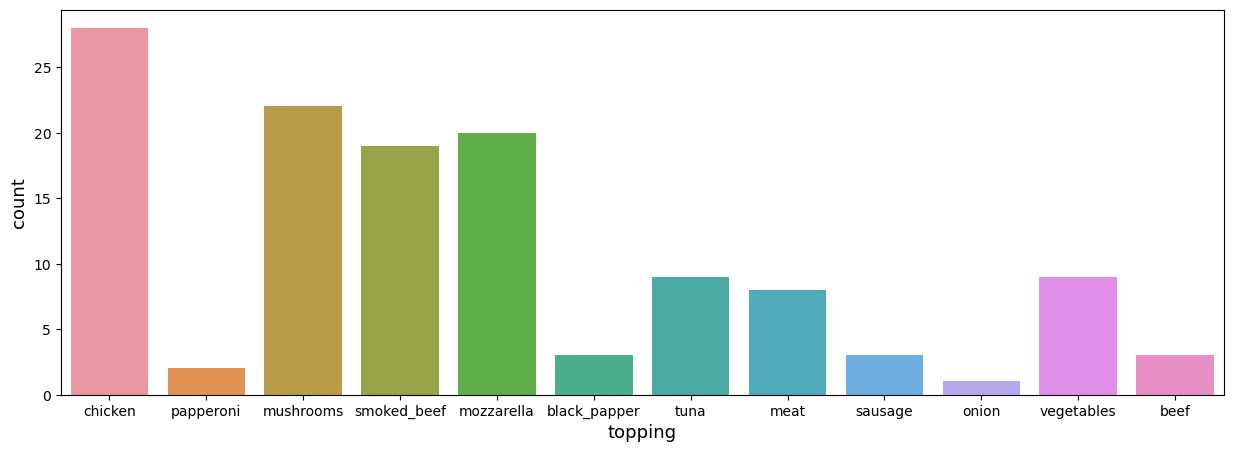

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x='topping', data=data)
plt.xlabel('topping', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.show()

In [44]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [45]:
data['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
double_decker         9
new_york              8
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

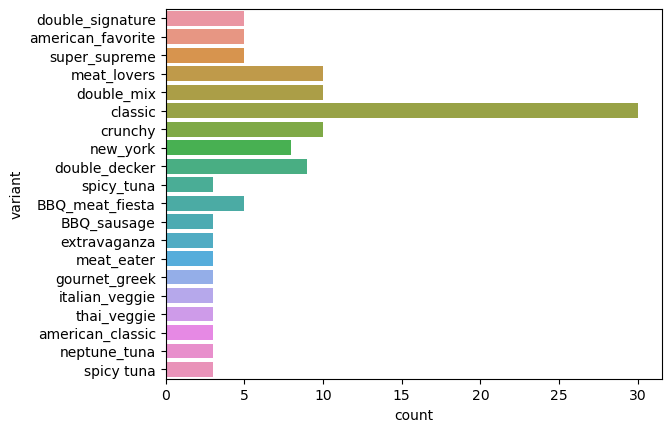

<Figure size 2500x1500 with 0 Axes>

In [46]:
sns.countplot(y='variant', data=data)
plt.figure(figsize=(25,15))
plt.show()

In [47]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [48]:
data['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL          8
Name: size, dtype: int64

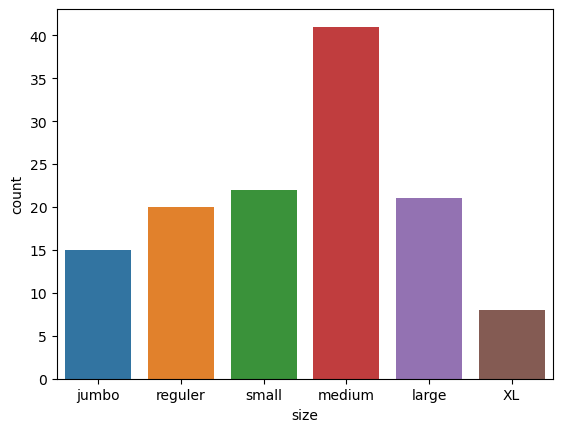

In [49]:
sns.countplot(x='size', data=data)
plt.show()

In [50]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [51]:
data['extra_sauce'].value_counts()

yes    76
no     51
Name: extra_sauce, dtype: int64

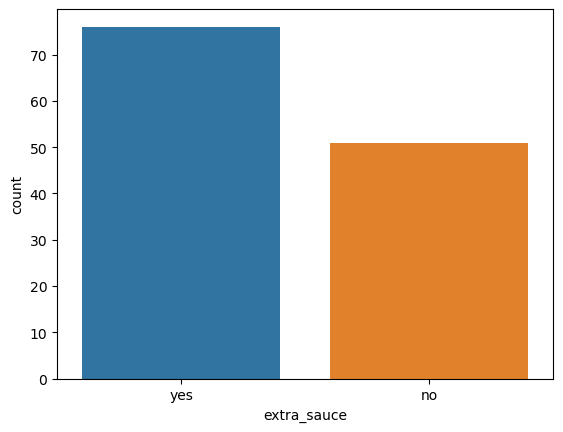

In [52]:
sns.countplot(x='extra_sauce', data=data)
plt.show()

In [53]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [54]:
data['extra_cheese'].value_counts()

yes    84
no     43
Name: extra_cheese, dtype: int64

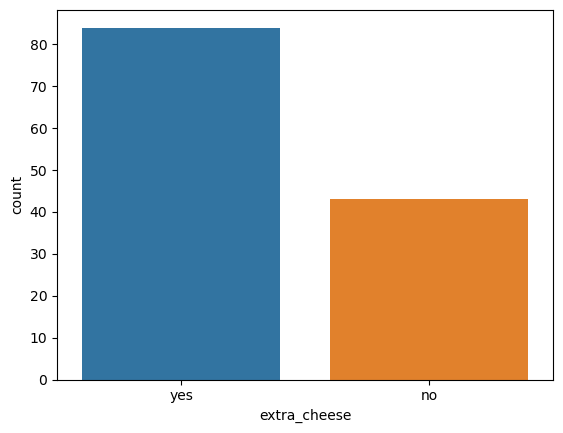

In [55]:
sns.countplot(x='extra_cheese', data=data)
plt.show()

In [56]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [57]:
data['extra_mushrooms'].value_counts()

yes    71
no     56
Name: extra_mushrooms, dtype: int64

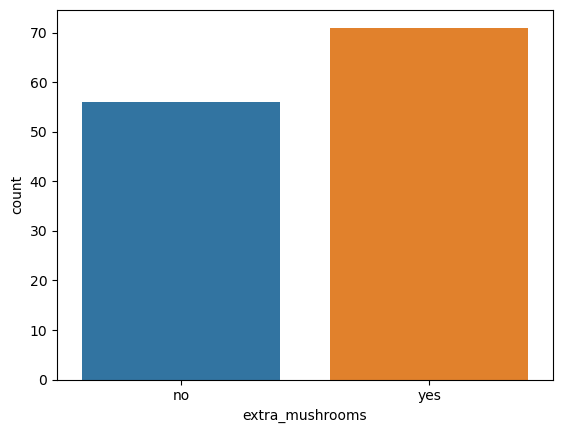

In [58]:
sns.countplot(x='extra_mushrooms', data=data)
plt.show()

# Bi-Varient analysis

In [59]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [60]:
# which company has highest price

In [61]:
data1=data.groupby('company')['price'].sum().reset_index()
data1

,company,price
0,A,3286000
1,B,1769000
2,C,2004000
3,D,1967500
4,E,2018000


In [62]:
print('company A has highest price')

company A has highest price


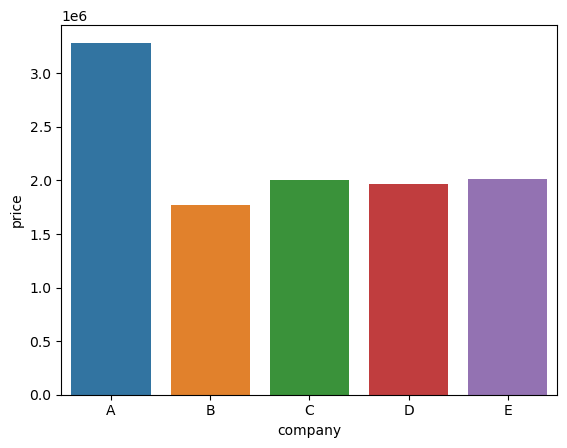

In [63]:
sns.barplot(x='company', y='price', data=data1)
plt.show()

In [64]:
print('company A has highest price')

company A has highest price


In [65]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [66]:
data1=data.groupby('diameter')['price'].sum().reset_index()
data1

,diameter,price
0,8.0,280000
1,8.5,832500
2,12.0,3657000
3,14.0,2242000
4,16.0,560000
5,16.5,596000
6,17.0,800000
7,18.0,248000
8,18.5,936000
9,20.0,198000


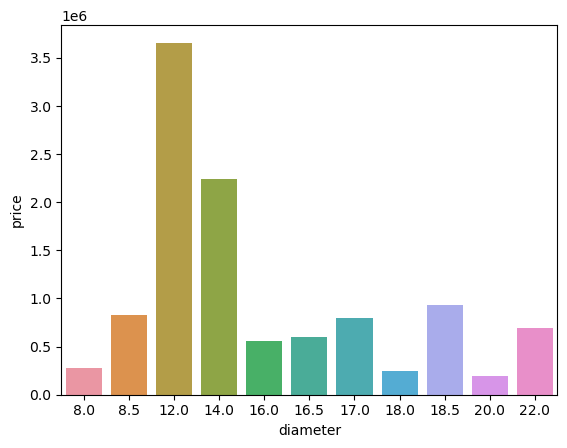

In [67]:
sns.barplot(x='diameter', y='price', data=data1)
plt.show()

In [68]:
print('diameter 12.0 has highest number of  price')

diameter 12.0 has highest number of  price


In [69]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [70]:
data['topping'].unique()

array(['chicken', 'papperoni', 'mushrooms', 'smoked_beef', 'mozzarella',
       'black_papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables',
       'beef'], dtype=object)

In [71]:
data1=data.groupby('topping')['price'].sum().sort_values(ascending=False).reset_index()
data1

,topping,price
0,chicken,2688000
1,mushrooms,1920000
2,smoked_beef,1906000
3,mozzarella,1719500
4,vegetables,600000
5,tuna,598000
6,meat,542000
7,black_papper,340000
8,papperoni,268000
9,sausage,210000


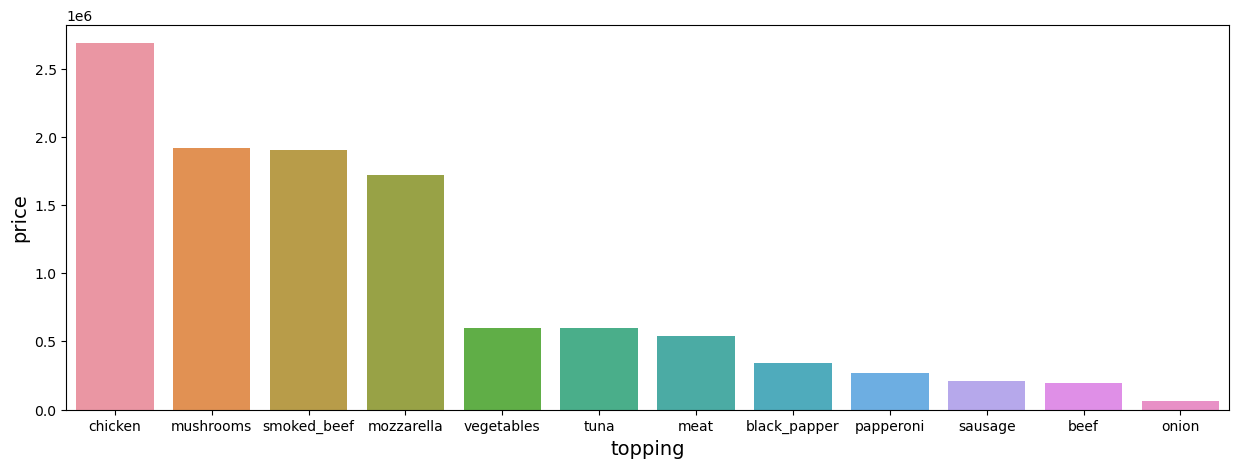

In [72]:
plt.figure(figsize=(15,5))
sns.barplot(x='topping', y='price', data=data1)
plt.xlabel('topping', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.show()

In [73]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [74]:
data1=data.groupby('variant')['price'].sum().sort_values(ascending=False).reset_index()
data1

,variant,price
0,classic,1691500
1,double_mix,1660000
2,meat_lovers,1000000
3,double_decker,979000
4,double_signature,956000
5,new_york,800000
6,crunchy,622000
7,super_supreme,500000
8,american_favorite,500000
9,BBQ_meat_fiesta,349000


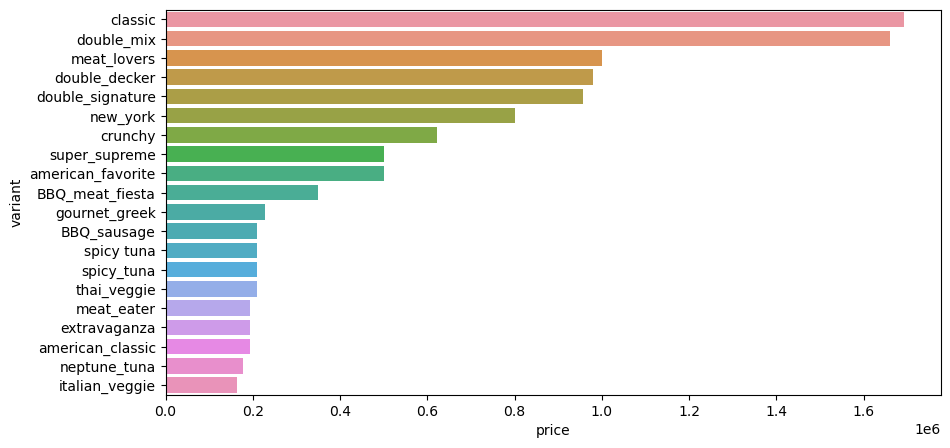

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(y='variant', x='price', data=data1)
plt.show()

In [76]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [77]:
data1=data.groupby('size')['price'].sum().sort_values(ascending=False).reset_index()
data1

,size,price
0,medium,2937000
1,jumbo,2517000
2,reguler,2099000
3,large,1859000
4,small,832500
5,XL,800000


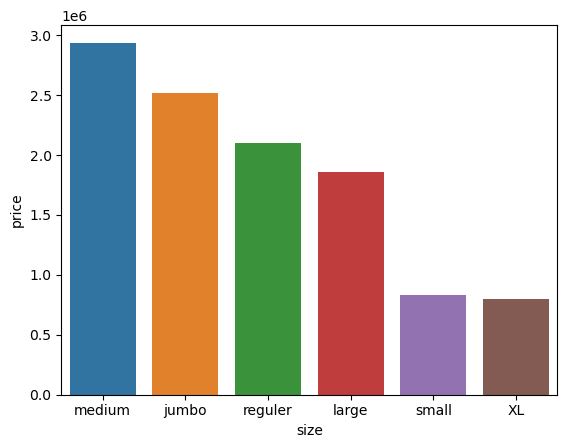

In [78]:
sns.barplot(x='size', y='price', data=data1)
plt.show()

In [79]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [80]:
data1=data.groupby('extra_sauce')['price'].sum().sort_values(ascending=False).reset_index()
data1

,extra_sauce,price
0,yes,6860500
1,no,4184000


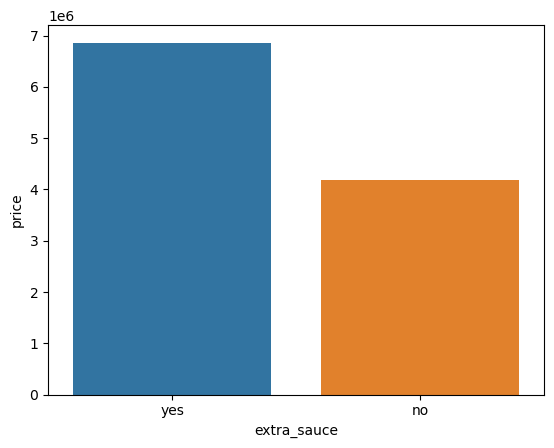

In [81]:
sns.barplot(x='extra_sauce', y='price', data=data1)
plt.show()

In [82]:
data1=data.groupby('extra_cheese')['price'].sum().sort_values(ascending=False).reset_index()
data1

,extra_cheese,price
0,yes,7329000
1,no,3715500


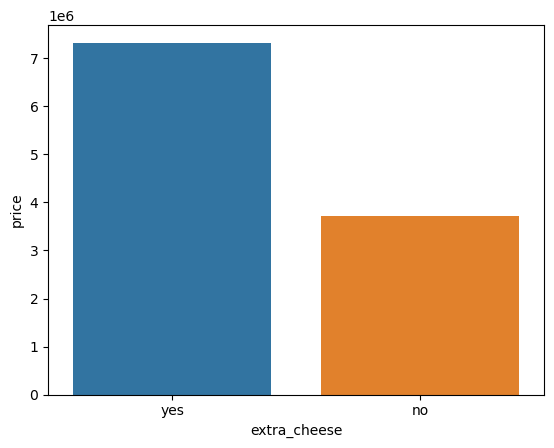

In [83]:
sns.barplot(x='extra_cheese', y='price', data=data1)
plt.show()

In [84]:
data1=data.groupby('extra_mushrooms')['price'].sum().sort_values(ascending=False).reset_index()
data1

,extra_mushrooms,price
0,yes,6254000
1,no,4790500


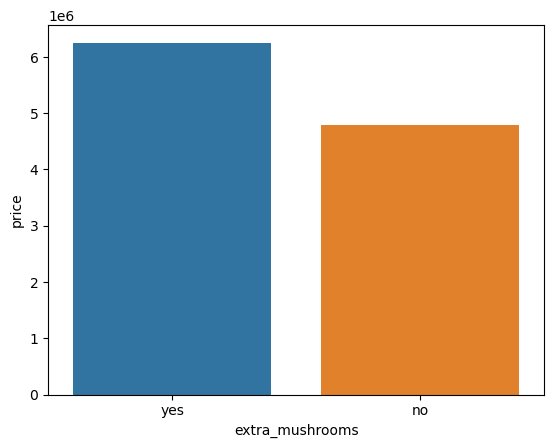

In [85]:
sns.barplot(x='extra_mushrooms', y='price', data=data1)
plt.show()

In [86]:
data['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL          8
Name: size, dtype: int64

In [87]:
data[data['size'].str.contains('jumbo', case=False)][['diameter']].value_counts()

diameter
18.5        6
16.0        4
22.0        3
18.0        1
20.0        1
dtype: int64

In [88]:
data[data['size'].str.contains('XL', case=False)][['diameter']].value_counts()

diameter
17.0        8
dtype: int64

In [89]:
# remove outlier
data[(data['size']=='jumbo')&(data['diameter']<=17)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,110000,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,110000,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,110000,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,110000,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [90]:
data=data.drop(data.index[[6, 11, 16, 80]])
data


,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,39000,8.5,tuna,spicy tuna,small,yes,yes,yes
125,E,72000,12.0,tuna,spicy tuna,medium,yes,yes,yes
126,E,99000,14.0,tuna,spicy tuna,large,yes,yes,yes
127,E,44000,8.5,meat,BBQ_meat_fiesta,small,yes,no,yes


In [91]:
data[(data['size']=='jumbo')&(data['diameter']<=17)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


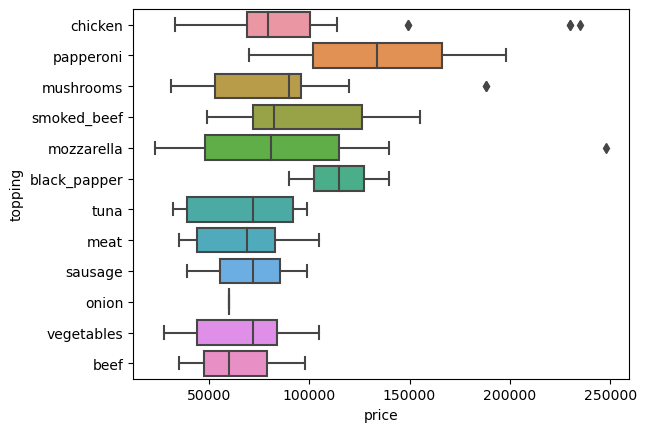

In [92]:
sns.boxplot(x=data['price'], y=data['topping'])
plt.show()

In [93]:
data['topping'].value_counts()

chicken         28
mushrooms       22
mozzarella      20
smoked_beef     16
tuna             9
vegetables       9
meat             8
sausage          3
beef             3
papperoni        2
black_papper     2
onion            1
Name: topping, dtype: int64

In [94]:
# Label encoding
cat_cols=data.select_dtypes(include=['object'])
cat_cols

,company,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,chicken,double_signature,jumbo,yes,yes,no
1,A,papperoni,double_signature,jumbo,yes,yes,no
2,A,mushrooms,double_signature,reguler,yes,yes,yes
3,A,smoked_beef,double_signature,reguler,yes,no,yes
4,A,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...
124,E,tuna,spicy tuna,small,yes,yes,yes
125,E,tuna,spicy tuna,medium,yes,yes,yes
126,E,tuna,spicy tuna,large,yes,yes,yes
127,E,meat,BBQ_meat_fiesta,small,yes,no,yes


In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
en=LabelEncoder()
for i in cat_cols:
    data[i]=en.fit_transform(data[i])

In [97]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000,22.0,2,8,1,1,1,0
1,0,198000,20.0,7,8,1,1,1,0
2,0,120000,16.0,5,8,4,1,1,1
3,0,155000,14.0,9,8,4,1,0,1
4,0,248000,18.0,4,8,1,1,0,1


# store feture matrix in x and response in target vector y

In [98]:
x=data.drop('price', axis=1)
y=data['price']

In [99]:
x

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,22.0,2,8,1,1,1,0
1,0,20.0,7,8,1,1,1,0
2,0,16.0,5,8,4,1,1,1
3,0,14.0,9,8,4,1,0,1
4,0,18.0,4,8,1,1,0,1
...,...,...,...,...,...,...,...,...
124,4,8.5,10,16,5,1,1,1
125,4,12.0,10,16,3,1,1,1
126,4,14.0,10,16,2,1,1,1
127,4,8.5,3,0,5,1,0,1


In [100]:
y

0      235000
1      198000
2      120000
3      155000
4      248000
        ...  
124     39000
125     72000
126     99000
127     44000
128     78000
Name: price, Length: 123, dtype: int32

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          123 non-null    int32  
 1   price            123 non-null    int32  
 2   diameter         123 non-null    float32
 3   topping          123 non-null    int32  
 4   variant          123 non-null    int32  
 5   size             123 non-null    int32  
 6   extra_sauce      123 non-null    int32  
 7   extra_cheese     123 non-null    int32  
 8   extra_mushrooms  123 non-null    int32  
dtypes: float32(1), int32(8)
memory usage: 5.3 KB


# splitting datasets in to training and test set

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
x_train

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
45,1,14.0,4,4,2,1,1,0
124,4,8.5,10,16,5,1,1,1
98,3,12.0,5,5,3,0,1,1
39,1,14.0,2,4,2,1,1,0
94,3,12.0,2,6,3,0,1,0
...,...,...,...,...,...,...,...,...
111,4,12.0,9,6,3,1,1,1
17,0,8.0,2,13,4,1,1,1
96,3,12.0,2,4,3,0,1,0
54,2,14.0,3,0,2,1,0,1


In [105]:
x_test

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
21,0,18.5,5,7,1,1,1,1
48,1,12.0,5,6,3,0,1,0
50,2,12.0,10,17,3,1,1,1
93,3,17.0,2,15,0,0,1,1
4,0,18.0,4,8,1,1,0,1
43,1,8.5,9,4,5,1,1,0
65,2,12.0,11,10,3,0,0,0
104,4,17.0,2,15,0,0,1,0
34,1,12.0,5,5,3,0,1,1
58,2,8.5,5,9,5,1,1,0


In [106]:
y_train

45      72000
124     39000
98      75000
39      72000
94      96000
        ...  
111    123000
17      70000
96      69000
54     105000
106     31000
Name: price, Length: 98, dtype: int32

In [107]:
y_test

21     188000
48      96000
50      72000
93      83000
4      248000
43      75000
65      78000
104     83000
34      75000
58      35000
56      72000
79     140000
12      70000
95      31000
97      93000
13      90000
81      70000
59      60000
121     49000
0      235000
29      83000
47      83000
69      84000
113     46000
27      72000
Name: price, dtype: int32

# import models

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [109]:
lr=LinearRegression()
lr.fit(x_train, y_train)

svr=SVR()
svr.fit(x_train, y_train)

rf=RandomForestRegressor()
rf.fit(x_train, y_train)

gr=GradientBoostingRegressor()
gr.fit(x_train, y_train)



GradientBoostingRegressor()

In [110]:
y_pred1=lr.predict(x_test)
y_pred2=svr.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)


In [111]:
print(y_pred1, y_pred2, y_pred3, y_pred4)

[160774.05565328  72539.86949425  80835.32376817 116124.94753785
 148204.54257648  45024.36140266  75907.74771899 110348.94108729
  77477.16830036  36545.62005907  78187.39934925 148516.12633107
  24054.20123173  36928.79066198  92201.43378963  74213.61052269
  11986.38884788  72840.03469049  75220.02376534 206328.78493513
 118413.30195042 113781.47270614 100827.09556122  73807.24916734
 102860.88996682] [76010.9512765  76001.31529794 76007.11633798 76012.92280391
 76011.21303508 75996.59613235 76004.39031238 76012.63068718
 76000.52608271 75998.59372364 75998.84109992 76013.76891462
 76003.80889319 75995.04309076 76002.38341623 76008.35251442
 76001.75806843 76003.74870959 76000.67529707 76012.68211389
 76013.21343319 76013.20799261 76007.58315814 75999.10133818
 76003.42254118] [163250.  95800.  71090. 118360. 146540.  44685.  88870. 119020.  64540.
  34645.  68300. 145360.  75345.  31680.  89660.  84420.  71955. 100685.
  60945. 211370. 117280. 117940.  95720.  48900.  75720.] [1845

In [112]:
df1=pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'SVM':y_pred2,'RF':y_pred3,'GR':y_pred4})
df1

,Actual,Lr,SVM,RF,GR
21,188000,160774.055653,76010.951277,163250.0,184518.844231
48,96000,72539.869494,76001.315298,95800.0,91186.150566
50,72000,80835.323768,76007.116338,71090.0,67304.935053
93,83000,116124.947538,76012.922804,118360.0,115815.896869
4,248000,148204.542576,76011.213035,146540.0,172443.475469
43,75000,45024.361403,75996.596132,44685.0,48631.936946
65,78000,75907.747719,76004.390312,88870.0,70476.788093
104,83000,110348.941087,76012.630687,119020.0,116456.650362
34,75000,77477.168300,76000.526083,64540.0,60818.879725
58,35000,36545.620059,75998.593724,34645.0,40290.293498


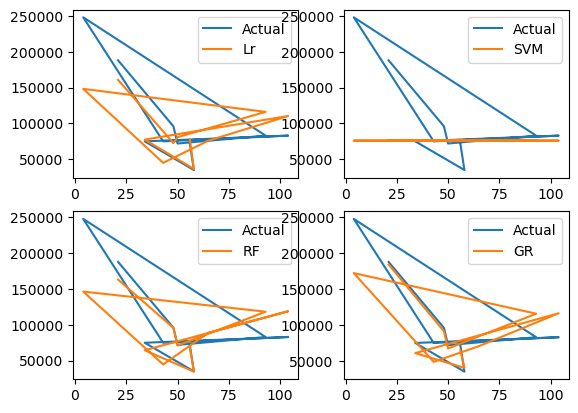

In [113]:
# compare performance visiually
#lr
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

#svm             
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['SVM'].iloc[0:11],label='SVM')
plt.legend()
  
#rf             
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['RF'].iloc[0:11],label='RF')
plt.legend()

#gr             
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['GR'].iloc[0:11],label='GR')
plt.legend()

# GradientBoostingRegressor is best model for this dataset

# Evaluate the Algorithm

In [114]:
from sklearn import metrics

In [115]:
#lr
score1=metrics.r2_score(y_test,y_pred1)
#svm
score2=metrics.r2_score(y_test,y_pred2)
#rf
score3=metrics.r2_score(y_test,y_pred3)
#gf
score4=metrics.r2_score(y_test,y_pred4)

# r2 ko score jahila -1 to 1 garxa
# it measure cofiicent of determinant

In [116]:
print(score1, score2, score3, score4)

0.6391199071772927 -0.09416511504241587 0.7258566528827752 0.8144148185036337


In [117]:
# errors
# lr
mse1=metrics.mean_squared_error(y_test, y_pred1)
#svm
mse2=metrics.mean_squared_error(y_test, y_pred2)
#rf
mse3=metrics.mean_squared_error(y_test, y_pred3)
#gr
mse4=metrics.mean_squared_error(y_test, y_pred4)

In [118]:
print(mse1, mse2, mse3, mse4)

1033707247.5139568 3134133558.184232 785257958.0 531591381.62335324


In [119]:
# absolute error
s1=metrics.mean_absolute_error(y_test, y_pred1)
#svm
s2=metrics.mean_absolute_error(y_test, y_pred2)
#rf
s3=metrics.mean_absolute_error(y_test, y_pred3)
#gr
s4=metrics.mean_absolute_error(y_test, y_pred4)

# junko error kaam hunxa tai choose garni

In [120]:
print(s1, s2, s3, s4)

24259.175549203752 31235.38465435655 17619.2 15927.757068131143


# junko error kaam hunxa tai choose garni

In [121]:
df={'company':0 ,'diameter':11 ,'topping':3 ,'variant':5 ,'size':1 , 'extra_sauce':1 ,'extra_cheese':1 ,'extra_mushrooms':1}
data_new=pd.DataFrame(df, index=[0])
data_new

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,11,3,5,1,1,1,1


In [122]:
new_pred=gr.predict

In [123]:
# save model using joblib
gr=GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

In [124]:
import joblib

In [125]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [126]:
model=joblib.load('model_joblib_gr')

In [127]:
model.predict(data_new)

array([68750.56503832])

# GUI

In [128]:
from tkinter import *

In [130]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    
    model = joblib.load('model_joblib_gr')
    result= model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    
    Label(master,text='Pizza Price:').grid(row=9)
    Label(master,text=result).grid(row=10)

master= Tk()
master.title('Pizza Price prediction')
label = Label(master,text='Pizza Price Prediction',bg='black',fg='white').grid()

Label(master,text='Enter Your Company:').grid(row=1)
Label(master,text='Diameter:').grid(row=2)
Label(master,text='Topping:').grid(row=3)
Label(master,text='variant:').grid(row=4)
Label(master,text='Size:').grid(row=5)
Label(master,text='Extra Sauce[0/1]:').grid(row=6)
Label(master,text='Extra cheese[0/1]:').grid(row=7)
Label(master,text='Extra Mushroom[0/1]:').grid(row=8)

e1= Entry(master)
e2= Entry(master)
e3= Entry(master)
e4= Entry(master)
e5= Entry(master)
e6= Entry(master)
e7= Entry(master)
e8= Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master, text='Predict',command=show_entry).grid()
mainloop()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
